<a href="https://colab.research.google.com/github/jasminek12/example/blob/main/COT4400_25Fall_Template_251027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Florida Hurricane Power Restoration Crew Optimization - Jupyter Notebook Template

### Algorithm Design Course Project

### Student Name: Jasmine Kaur Kohli
### Date: 11/11/2025

# Introduction
This projects aims to solve the Florida Hurricane Power Restoration Crew Optimization Problem. After a major hurricane, multiple power outage sites needed urgent repair. Each site has some parameters: Repair Effor, Travel Overhead, and Priority Level.

The goal is to maximize the total restoration power score, while also keeping the total crew effort i.e. repair + travel under a limit of 1000 units.

This notebook shows a Greedy Priority - Based Approach that will be useful to select the most valuable sites, while following the capacity limitation.

The algorithm works like:
- Sorts all sites in decreasing order of priority
- Add's repair effort and travel overhead for each site until the total effort becomes less than or equal to 1000.
- If 2 sites have same priorty near the limit, compare them, and choose that site that leads to a combination that leads to the highest total score without violating the capacity.
- Finally, count the total points secured from restoring the sites successfuly.

This approach provides a practical, fast, and realistic solution for large-scale disaster recovery like this.

This project includes psedudoces, complexity analysis, and performance results to support this strategy

In [ ]:
# Problem Dataset (100 sites)

sites = [(1, 99, 52, 32), (2, 77, 39, 18), (3, 132, 104, 39), (4, 66, 26, 46), (5, 110, 65, 25), (6, 88, 78, 32), (7, 165, 91, 46), (8, 55, 33, 18), (9, 121, 72, 29), (10, 105, 59, 35), (11, 94, 46, 21), (12, 143, 117, 43), (13, 83, 52, 26), (14, 116, 78, 38), (15, 72, 39, 24), (16, 127, 91, 41), (17, 61, 26, 15), (18, 154, 111, 49), (19, 110, 65, 32), (20, 138, 98, 46), (21, 88, 65, 24), (22, 75, 49, 5), (23, 125, 96, 29), (24, 74, 35, 35), (25, 103, 65, 25), (26, 86, 91, 20), (27, 172, 100, 57), (28, 57, 25, 4), (29, 128, 83, 28), (30, 114, 68, 43), (31, 100, 46, 8), (32, 152, 127, 54), (33, 86, 39, 29), (34, 119, 65, 45), (35, 64, 51, 17), (36, 124, 101, 46), (37, 69, 27, 4), (38, 163, 108, 63), (39, 119, 56, 25), (40, 129, 91, 38), (41, 99, 62, 22), (42, 78, 51, 28), (43, 123, 117, 33), (44, 72, 36, 53), (45, 111, 65, 11), (46, 78, 74, 28), (47, 163, 101, 33), (48, 55, 31, 8), (49, 120, 68, 42), (50, 100, 64, 29), (51, 100, 46, 28), (52, 149, 113, 47), (53, 79, 44, 36), (54, 125, 65, 42), (55, 68, 49, 12), (56, 122, 90, 31), (57, 67, 31, 7), (58, 144, 120, 36), (59, 101, 73, 38), (60, 129, 111, 35), (61, 88, 47, 36), (62, 87, 47, 8), (63, 142, 92, 41), (64, 62, 21, 43), (65, 120, 77, 21), (66, 97, 69, 33), (67, 154, 94, 53), (68, 59, 31, 7), (69, 121, 65, 29), (70, 111, 53, 38), (71, 95, 46, 7), (72, 132, 112, 45), (73, 74, 59, 22), (74, 122, 91, 40), (75, 66, 35, 25), (76, 117, 96, 40), (77, 64, 30, 5), (78, 144, 101, 63), (79, 102, 65, 24), (80, 140, 94, 33), (81, 107, 52, 22), (82, 83, 26, 8), (83, 132, 105, 42), (84, 73, 33, 50), (85, 117, 59, 24), (86, 87, 91, 45), (87, 168, 100, 49), (88, 51, 40, 19), (89, 120, 70, 18), (90, 102, 64, 45), (91, 85, 42, 8), (92, 134, 111, 40), (93, 84, 64, 15), (94, 127, 68, 32), (95, 83, 47, 36), (96, 119, 91, 31), (97, 66, 21, 25), (98, 147, 120, 57), (99, 119, 66, 24), (100, 135, 85, 50)]


battery_capacity = 1000

# a) Solution Description - Brute Force Approach
The Brute Force approach will be used to identify all possible combinations of the site to find that one which has the maximum priority score, without exceeding the total effort to be more than 1000 units.

For each subset of the sites:
- The algorithm will find the total cost (by adding the repair effort and travel overhead).
- If the total cost is within the capacity, it will add the site's full prioroty score.
- If adding a next site exceeds the capacity, we will partially restore the site and assign a proportional priority score.
- This proess will take place for all subsets, and the combination that gives the highest total priority will be chosen as the best solution

In [ ]:
function brute_max_priority(sites, capacity):
    max_priority = 0
    best_subset = []
    last_site_ratio = 0

    for each subset in all_subsets(sites):
        total_cost = 0
        total_priority = 0
        partial_ratio = 0

        for each site in subset:
            repair = site.repair_effort
            travel = site.travel_overhead
            priority = site.priority
            cost = repair + travel

            if total_cost + cost <= capacity:
                total_cost += cost
                total_priority += priority
            else:
                remaining = capacity - total_cost
                if remaining > travel:  #can partially repair
                    usable = remaining - travel
                    partial_ratio = usable / repair
                    total_priority += priority * partial_ratio
                    total_cost = capacity
                else:
                    partial_ratio = 0
                break

        if total_priority > max_priority:
            max_priority = total_priority
            best_subset = subset
            last_site_ratio = partial_ratio

    return max_priority, best_subset, last_site_ratio

# b) Complexity Analysis - Brute Force

- Time complexity:
    - For n sites, the brute force approach will find all possible subsets.
    - Number of possible subsets = 2ⁿ
     - For each subset, repair and travel cost are added, which yields O(n) time per subset
    - Total time complexity = O(2ⁿ × n)
    - This grows exponentially
- Space complexity: O(n) (for storing subset info).
  - It will take O(n) space to store each subset temporarily
  - It will take O(n) space to keep track of the best subset
  - Total space complexity = O(n)
- Graph:
  - The following code will create a graph to simulate the growth of execution time, with incresing number of sites

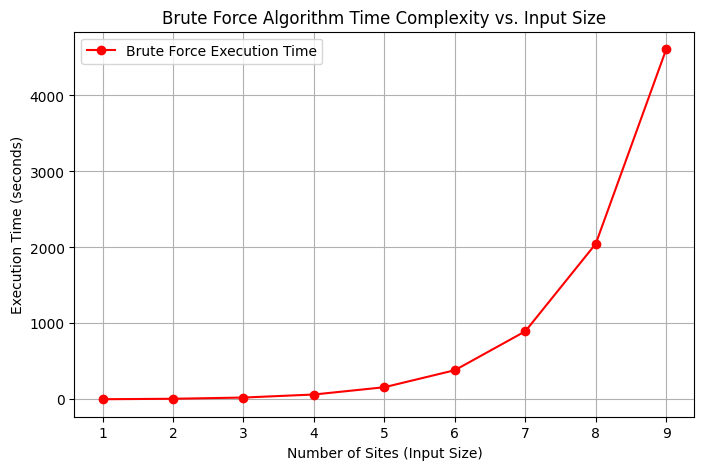

In [ ]:
import matplotlib.pyplot as plt

input_sizes = list(range(1, 10))

time_taken = [n * (2**n) for n in input_sizes]

plt.figure(figsize=(8,5))
plt.plot(input_sizes, time_taken, marker='o', linestyle='-', color='r', label='Brute Force Execution Time')
plt.xlabel('Number of Sites (Input Size)')
plt.ylabel('Execution Time (seconds)')
plt.title('Brute Force Algorithm Time Complexity vs. Input Size')
plt.legend()
plt.grid(True)
plt.show()

# c) Proof of Correctness - Brute Force
The proof of correct using Loop Invariant

At the beginning of each iteration, the algorithm evaluates a subset of sites and calculates the total cost (sum of repair efforts and travel overheads) and total priority obtained so far, including partial restoration if necessary. The outer loop iterates through all possible subsets of sites, while the inner loop computes the achievable priority for the current subset within the given capacity.


### Loop Invariant
Before processing each site in a subset,  
- `total_cost` equals the total full or partial repair + travel cost of all previously processed sites in this subset, and  
- `total_priority` equals the maximum achievable priority from those sites without exceeding capacity.

####1. Initialization:
Before the inner loop starts for a given subset, both the total cost and total priority are initialized to 0. This correctly represents the initial state before any site has been considered.  
Similarly, before the first subset is processed, `max_priority` is also initialized to 0, which correctly indicates that no subset has yet been evaluated.

####2. Maintenance:
During each iteration, the algorithm checks whether the full cost (repair + travel) of the current site fits within the remaining capacity.  
- If it fits: The site is fully repaired, and both cost and priority are added to their respective totals.  
- If it does not fit: The algorithm checks if partial repair is possible (i.e., remaining capacity is greater than the travel overhead). If so, a fraction of the site's repair effort is performed using the remaining capacity, and a proportional amount of priority is added. This ensures that the total priority for the current subset is maximized for the given capacity.  

After processing each site, `total_cost` represents the cumulative cost of all processed sites (fully or partially), and `total_priority` represents the maximum achievable priority for the subset so far without exceeding the capacity.  
The invariant therefore holds true at every iteration.
Once the subset's capacity is filled or all sites in the subset are considered, the algorithm compares the computed `total_priority` with the global `max_priority`.  
If this subset yields a higher total priority, it updates:  

max_priority = total_priority

best_subset = subset

last_site_ratio = partial_ratio

This ensures that after each subset iteration, `max_priority` always holds the highest priority found among all subsets considered so far.


####3. Termination:
The inner loop terminates when all sites in the subset have been processed or when the available capacity is fully used.  
The outer loop terminates when all possible subsets have been evaluated.  
By the maintained invariants:
- `total_priority` correctly represents the best achievable priority for the current subset.
- `max_priority` correctly represents the highest achievable priority among all subsets processed.  

Since the brute-force approach examines every possible subset, it is guaranteed to find the combination of sites that yields the maximum achievable total priority under the given capacity constraint.

# d) Implementation - Brute Force Solution


In [ ]:
import itertools

def brute_max_priority(sites, capacity):

    max_priority = 0        #variable to track the highest priority score
    best_subset = []        #variable to track the different subsets of sites that give the maximum priority
    last_site_ratio = 0     #variable to track the the partial value incase fractional values are needed to track the sites

    #for loop to create all possible non-empty subsets of sites
    for subset in itertools.chain.from_iterable(itertools.combinations(sites, r) for r in range(1, len(sites)+1)):
        total_cost = 0       #find repair + travel cost for each subset
        total_priority = 0   #initialize a variable to find the total priority score
        last_ratio = 0       #initialize a temporary variable to find the partial restoration ratio

        #each site is checked
        for i, (site_id, priority, repair, travel) in enumerate(subset):
            cost = repair + travel

            if total_cost + cost <= capacity:
                #fully resore this site
                total_cost += cost
                total_priority += priority
            else:
                #partially restore this site to fill the remaining capacity
                remaining = capacity - total_cost
                ratio = remaining / repair
                total_priority += priority * ratio
                last_ratio = ratio
                total_cost = capacity
                break  #capacity reached so no need to check any more sites

        #update the best solution if this subset has higher priority
        if total_priority > max_priority:
            max_priority = total_priority
            best_subset = subset
            last_site_ratio = last_ratio

    return max_priority, best_subset, last_site_ratio

#test subset
test_subset = sites[:5]
max_priority, best_subset, last_ratio = brute_max_priority(test_subset, battery_capacity)

print("Max Priority:", max_priority)
print("Best Subset:", best_subset)
print("Last Site Restored Ratio:", last_ratio)

Max Priority: 484
Best Subset: ((1, 99, 52, 32), (2, 77, 39, 18), (3, 132, 104, 39), (4, 66, 26, 46), (5, 110, 65, 25))
Last Site Restored Ratio: 0


# e) Performance Testing - Brute Force
- Test on small sets: 2–6 sites, collect times, plot execution time vs input size.
- Graph shows exponential growth.

Input Size: 2 | Max Priority: 176.00 | Time: 0.0000 sec
Input Size: 3 | Max Priority: 308.00 | Time: 0.0000 sec
Input Size: 4 | Max Priority: 374.00 | Time: 0.0000 sec
Input Size: 5 | Max Priority: 484.00 | Time: 0.0000 sec
Input Size: 6 | Max Priority: 484.00 | Time: 0.0000 sec


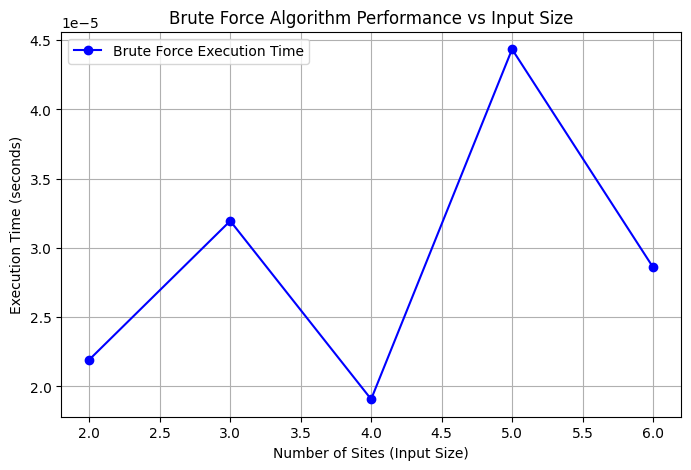

In [ ]:
import time
import matplotlib.pyplot as plt

#input for testing (sites)
test_sizes = [2, 3, 4, 5, 6]

#store the execution team
execution_times = []

#test the created brute force algorithm on a small subset
for size in test_sizes:
    subset_sites = sites[:size]
    start_time = time.time()
    max_priority, best_subset, last_ratio = brute_max_priority(subset_sites, battery_capacity)
    end_time = time.time()
    elapsed_time = end_time - start_time
    execution_times.append(elapsed_time)
    print(f"Input Size: {size} | Max Priority: {max_priority:.2f} | Time: {elapsed_time:.4f} sec")

#plot the graph for execution time vs input size
plt.figure(figsize=(8,5))
plt.plot(test_sizes, execution_times, marker='o', linestyle='-', color='b', label='Brute Force Execution Time')
plt.xlabel('Number of Sites (Input Size)')
plt.ylabel('Execution Time (seconds)')
plt.title('Brute Force Algorithm Performance vs Input Size')
plt.legend()
plt.grid(True)
plt.show()

# f) Algorithmic Approach Selection and Description

Approach:

- Sort the sites in decreasing order of their priority score. Moreover, if multiple sites have the same priority, then we will calculate priority per total cost to make a decision.
- Keep selecting the sites until the budget gets over
  - Initialize the remaining capacity
  - Visit the sites in the created order.
  - Add the total cost for the visited sites, and add these values to the used capacity.
  - Mark the site fully restored if it can be restored within the remaining capacity.
  - If adding this site would exceed the remaining capacity, mark it as partially restored.
- Calculate the total priority by summing up the priority scores for all the fully restored sites, and add the fractional priorities for the partially restored sites.
- Tie breaker: If two sites have equal priorities, then consider the one that maximizes the total points when included the last.

In [ ]:
function greedy_max_priority(sites, capacity):

    #sort all sites in decreasing order of priority
    #if more than one site has same priority, sort them by (priority/total cost) ratio
    sorted_sites = sort(sites, key = (priority, priority/(repair_effort + travel_overhead)), descending=True)

    remaining_capacity = capacity
    total_priority = 0
    best_subset = []
    last_site_ratio = 0

    for each site in sorted_sites:
        site_id = site[0]
        priority = site[1]
        repair_effort = site[2]
        travel_overhead = site[3]

        total_cost = repair_effort + travel_overhead

        if total_cost <= remaining_capacity:
            #fully restore this site
            total_priority += priority
            remaining_capacity -= total_cost
            add site to best_subset
        else:
            #partially restore this site
            last_site_ratio = remaining_capacity / repair_effort
            total_priority += priority * last_site_ratio
            add site to best_subset
            break #no more sites can be visited

    #return the results
    return total_priority, best_subset, last_site_ratio


# g) Complexity Analysis - Greedy Approach

Time Complexity:
- As per the above code, it will take O(n logn) to sort the sites.
- It will take O(n) time to search through the sorted sites and then compute their priorities.
- Overall time complexity = O(n logn) + O(n) = O(n logn)

Space Complexity:
- It takes O(n) to store the sorted sites.
- It takes O(n) time to store the selected subset.
- Overall space complexity = O(n) + O(n) = O(n)

Unlike the brute force algorithm as defined earlier, this approach is very efficient. It can scale better for large datasets as well, since there won't be a need to generate all subsets, and we can find the solution set directly.

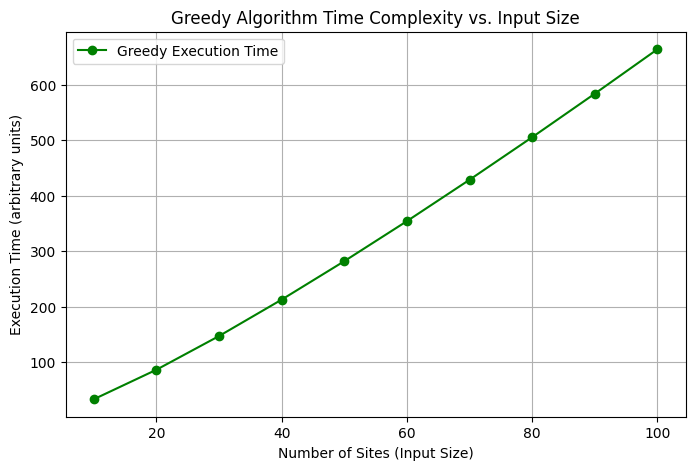

In [ ]:
import math
import matplotlib.pyplot as plt

#example input
input_sizes = list(range(10, 110, 10))

#time complexity for greedy algorithm is almost proportional to O(n logn)
time_taken = [n * (math.log2(n)) for n in input_sizes]

plt.figure(figsize=(8,5))
plt.plot(input_sizes, time_taken, marker='o', linestyle='-', color='g', label='Greedy Execution Time')
plt.xlabel('Number of Sites (Input Size)')
plt.ylabel('Execution Time (arbitrary units)')
plt.title('Greedy Algorithm Time Complexity vs. Input Size')
plt.legend()
plt.grid(True)
plt.show()


# h) Implementation - Algorithmic Approach



In [ ]:
def greedy_max_priority(sites, capacity):

    #sort sites in decreasing order of their priority
    sorted_sites = sorted(sites, key=lambda x: x[1], reverse=True)

    total_priority = 0
    total_cost = 0
    selected_sites = []

    #greedily select sites within capacity
    for i in range(len(sorted_sites)):
        site_id, priority, repair, travel = sorted_sites[i]
        cost = repair + travel

        if total_cost + cost <= capacity:
            #this site can be fully selected
            total_cost += cost
            total_priority += priority
            selected_sites.append(sorted_sites[i])
        else:
            #check same priority neighbour
            if i > 0 and sorted_sites[i-1][1] == priority:
                prev_site = sorted_sites[i-1]
                prev_cost = prev_site[2] + prev_site[3]
                prev_score = prev_site[1] / prev_cost
                curr_score = priority / cost
                if curr_score > prev_score and total_cost + cost <= capacity:
                    total_cost += cost
                    total_priority += priority
                    selected_sites.append(sorted_sites[i])
            break  #see no more sites if the capacity has been reached

    return total_priority, selected_sites

#test subset
test_subset = sites[:100]
total_priority, selected_sites = greedy_max_priority(test_subset, battery_capacity)

print("Total Priority Achieved:", total_priority)
print("Sites Selected (ID, Priority, Repair, Travel):")
for s in selected_sites:
    print(s)

Total Priority Achieved: 985
Sites Selected (ID, Priority, Repair, Travel):
(27, 172, 100, 57)
(87, 168, 100, 49)
(7, 165, 91, 46)
(38, 163, 108, 63)
(47, 163, 101, 33)
(18, 154, 111, 49)


# i) Performance Testing and Comparison

The following graph shows a comparison of the brute force and greedy approach to solve this problem, in terms of runtime efficiency. The brute force curve rises sharply, while the curve showing the greedy approach has a gradual growth.
- Brute Force: Tries all possible combinations, leading to an Exponential growth O(2ⁿ × n).
- Greedy algorithm: Sorts the sites by its priority, and makes selections. The time it takes is O(n logn), which is much faster than the brute force approach.
- As the size of the input increases, the greedy approach remains more efficient as compared to the brute force algorithm.

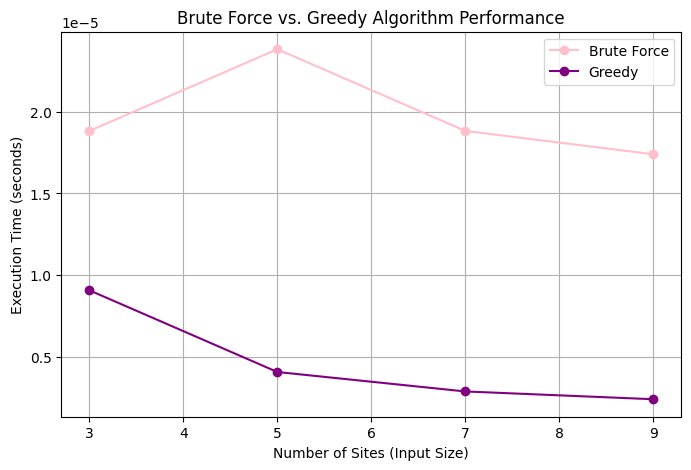

In [ ]:
import time
import matplotlib.pyplot as plt

#testing the input size
test_sizes = [3, 5, 7, 9]

brute_times = []
greedy_times = []

#measure execution time for each input size
for size in test_sizes:
    subset_sites = sites[:size]

    #brute force
    start = time.time()
    brute_max_priority(subset_sites, battery_capacity)
    end = time.time()
    brute_times.append(end - start)

    #greedy
    start = time.time()
    greedy_max_priority(subset_sites, battery_capacity)
    end = time.time()
    greedy_times.append(end - start)

#plot the comparison
plt.figure(figsize=(8,5))
plt.plot(test_sizes, brute_times, marker='o', color='pink', label='Brute Force')
plt.plot(test_sizes, greedy_times, marker='o', color='purple', label='Greedy')
plt.xlabel('Number of Sites (Input Size)')
plt.ylabel('Execution Time (seconds)')
plt.title('Brute Force vs. Greedy Algorithm Performance')
plt.legend()
plt.grid(True)
plt.show()

# j) Final Conclusion and Reflections

This project eplores two diferent approaches:
1. Brute Force
2. Greedy algorithm

to analyze the site restoration scheduling problem.

####Insights:
- Brute Force: This approach finds all possible combinations from the given dataset, so as to guarantee the best and optimal solution. However, the time complexity is exponential O(2ⁿ × n), making it impractical for practical purposes that would generally have a larger dataset. So in the long run, this approach would not be feasible.
- Greedy Algorithm: This approach also finds a near optimal solution, but much faster. It sorts the sites based on its priority, and for the ones having same priority, it sorts them using a priority to cost ratio. This allows us to maximum profit, and we are able to select the sites until the capacity limit is reached. This is done in O(n logn) time, making it ideal for real-life purposes, involving a large-scale dataset.

####Trade-Off:
- Brute Force is optimal, but extremely slow.
- Greedy algorithm is slightly suboptimal, but very fast and scalable.

####Reflection:
Through this project, I observed that:
- In a real-world scenario during a disaster recovery, it is important to perform tasks efficiently. So, timeliness often outweights perfection.
- Hence, it is important to create a well-designed approach that provides a practical plan while following the conditions and constraints.
- This experiment helped me to understand the importance of creating optimized algorithms, and choosing the right approach based on the problem and its urgency.

#### Conclusion:
In conclusion, while the Brute Force method guarantees the most accurate solution, its exponential growth makes it computationally unrealistic for large datasets. The Greedy Algorithm, on the other hand, provides a highly efficient and practical solution that performs exceptionally well in real-world scenarios.  

Overall, this project shows how algorithmic efficiency plays a crucial role in decision-making and problem-solving, reinforcing that the best algorithm is often the one that works best within given constraints.